# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from jupyterthemes import jtplot
#jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [3]:
# Load the data
tweets_df = pd.read_csv('dat1.csv')

In [4]:
tweets_df

,tweet,bullying
0,So Drasko just said he was impressed the girls...,1
1,So Drasko just said he was impressed the girls...,1
2,Drasko they didn't cook half a bird you idiot,1
3,Drasko they didn't cook half a bird you idiot,1
4,Hopefully someone cooks Drasko in the next ep of,1
...,...,...
5994,Nice to meet @robmurphymkr @tasteofsydney htt...,0
5995,@owrangle Instant replays of people boiling an...,0
5996,Just chilling in #CrabFest15 VIP with the one ...,0
5997,contestant Annie Caroline was shocked by cons...,0


In [5]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet     5997 non-null   object
 1   bullying  5999 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 93.9+ KB


In [6]:
tweets_df.describe()

,bullying
count,5999.000000
mean,0.492415
std,0.499984
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [7]:
tweets_df['tweet']

0       So Drasko just said he was impressed the girls...
1       So Drasko just said he was impressed the girls...
2          Drasko they didn't cook half a bird you idiot 
3          Drasko they didn't cook half a bird you idiot 
4       Hopefully someone cooks Drasko in the next ep of 
                              ...                        
5994    Nice to meet @robmurphymkr  @tasteofsydney htt...
5995    @owrangle Instant replays of people boiling an...
5996    Just chilling in #CrabFest15 VIP with the one ...
5997     contestant Annie Caroline was shocked by cons...
5998    @MJB_SF sorry about the trolls. i've got that ...
Name: tweet, Length: 5999, dtype: object

MINI CHALLENGE #1: 
- Drop the 'id' column from the DataFrame. 
- Ensure that the column has been succesfully dropped. 

In [8]:
tweets_df = tweets_df.dropna()

In [9]:
tweets_df

,tweet,bullying
0,So Drasko just said he was impressed the girls...,1
1,So Drasko just said he was impressed the girls...,1
2,Drasko they didn't cook half a bird you idiot,1
3,Drasko they didn't cook half a bird you idiot,1
4,Hopefully someone cooks Drasko in the next ep of,1
...,...,...
5994,Nice to meet @robmurphymkr @tasteofsydney htt...,0
5995,@owrangle Instant replays of people boiling an...,0
5996,Just chilling in #CrabFest15 VIP with the one ...,0
5997,contestant Annie Caroline was shocked by cons...,0


# TASK #3: EXPLORE DATASET

<AxesSubplot:>

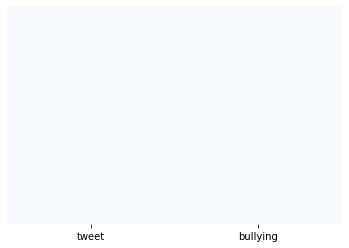

In [10]:
 sns.heatmap(tweets_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

array([[<AxesSubplot:title={'center':'bullying'}>]], dtype=object)

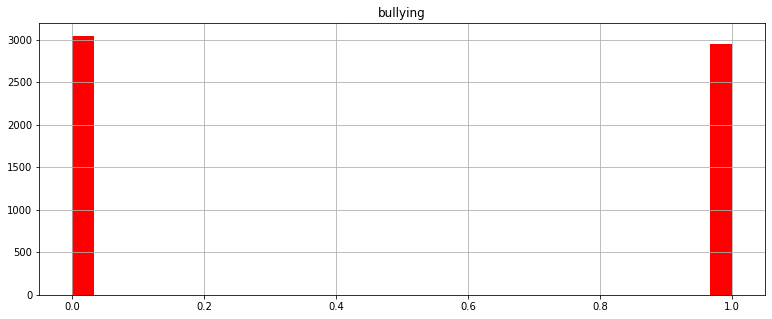

In [11]:
tweets_df.hist(bins = 30, figsize = (13,5), color = 'r')

MINI CHALLENGE #2: 
- Plot similar figure using seaborn countplot

/home/pavan/snap/jupyter/common/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bullying', ylabel='count'>

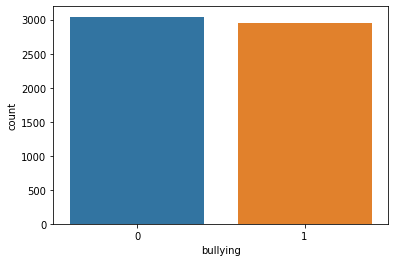

In [12]:
sns.countplot(tweets_df['bullying'], label = "Count") 

In [13]:
# Let's get the length of the messages
tweets_df['length'] = tweets_df['tweet'].apply(len)

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
tweets_df

,tweet,bullying,length
0,So Drasko just said he was impressed the girls...,1,96
1,So Drasko just said he was impressed the girls...,1,96
2,Drasko they didn't cook half a bird you idiot,1,46
3,Drasko they didn't cook half a bird you idiot,1,46
4,Hopefully someone cooks Drasko in the next ep of,1,49
...,...,...,...
5994,Nice to meet @robmurphymkr @tasteofsydney htt...,0,66
5995,@owrangle Instant replays of people boiling an...,0,93
5996,Just chilling in #CrabFest15 VIP with the one ...,0,117
5997,contestant Annie Caroline was shocked by cons...,0,135


<AxesSubplot:ylabel='Frequency'>

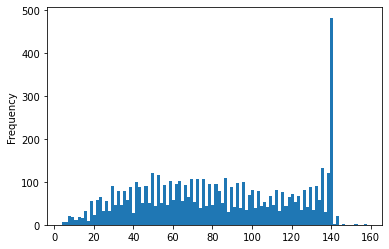

In [15]:
tweets_df['length'].plot(bins=100, kind='hist') 

In [16]:
tweets_df.describe()

,bullying,length
count,5997.000000,5997.000000
mean,0.492580,82.587961
std,0.499987,38.140962
min,0.000000,4.000000
25%,0.000000,51.000000
50%,0.000000,80.000000
75%,1.000000,117.000000
max,1.000000,158.000000


In [17]:
# Let's see the shortest message 
tweets_df[tweets_df['length'] == min(tweets_df['length'])]['tweet'].iloc[0]

'Yuk '

MINI CHALLENGE #3
- View the message with the average length

In [18]:
tweets_df[tweets_df['length'] == tweets_df[['length']].mean(axis=1)]['tweet'].iloc[0]

'So Drasko just said he was impressed the girls cooked half a chicken.. They cooked a whole one  '

In [19]:
positive = tweets_df[tweets_df['bullying']==0]

In [20]:
positive

,tweet,bullying,length
2954,Someone is going home ...that obviously canno...,0,54
2955,They didn't even wash the chicken 😩,0,36
2956,Is honestly so fucking staged. The most over ...,0,83
2957,So bummed the dull chicks on are using such a...,0,116
2958,So bummed the dull chicks on are using such a...,0,116
...,...,...,...
5994,Nice to meet @robmurphymkr @tasteofsydney htt...,0,66
5995,@owrangle Instant replays of people boiling an...,0,93
5996,Just chilling in #CrabFest15 VIP with the one ...,0,117
5997,contestant Annie Caroline was shocked by cons...,0,135


In [21]:
negative = tweets_df[tweets_df['bullying']==1]

In [22]:
negative

,tweet,bullying,length
0,So Drasko just said he was impressed the girls...,1,96
1,So Drasko just said he was impressed the girls...,1,96
2,Drasko they didn't cook half a bird you idiot,1,46
3,Drasko they didn't cook half a bird you idiot,1,46
4,Hopefully someone cooks Drasko in the next ep of,1,49
...,...,...,...
2949,"RT @Superjutah: @MT8_9 £34,000 is £9000 above ...",1,116
2950,RT @DufresneFrank: “@gabystama: @DufresneFrank...,1,138
2951,RT @BoycottBrandy: @ActionFlickDoc this person...,1,140
2952,RT @Lyall: Patriarchy™ will expel me if I divu...,1,97


# TASK #4: PLOT THE WORDCLOUD

In [23]:
sentences = tweets_df['tweet'].tolist()
len(sentences)

5997

In [24]:
sentences_as_one_string =" ".join(sentences)

In [25]:
sentences_as_one_string

'So Drasko just said he was impressed the girls cooked half a chicken.. They cooked a whole one   So Drasko just said he was impressed the girls cooked half a chicken.. They cooked a whole one   Drasko they didn\'t cook half a bird you idiot  Drasko they didn\'t cook half a bird you idiot  Hopefully someone cooks Drasko in the next ep of  Hopefully someone cooks Drasko in the next ep of  of course you were born in serbia...you\'re as fucked as A Serbian Film  These girls are the equivalent of the irritating Asian girls a couple years ago. Well done, 7.    Lost the plot - where\'s the big Texan with the elephant sized steaks that they all have for brekkie ?   Lost the plot - where\'s the big Texan with the elephant sized steaks that they all have for brekkie ? RT @PhxKen: SIR WINSTON CHURCHHILL: "ISLAM IS A DANGEROUS IN A MAN AS RABIES IN A DOG" http://t.co/kCXgKD70SK RT @TheRightWingM: Giuliani watched his city attacked &amp RT @YesYoureRacist: At least you\'re only a tiny bit racist R

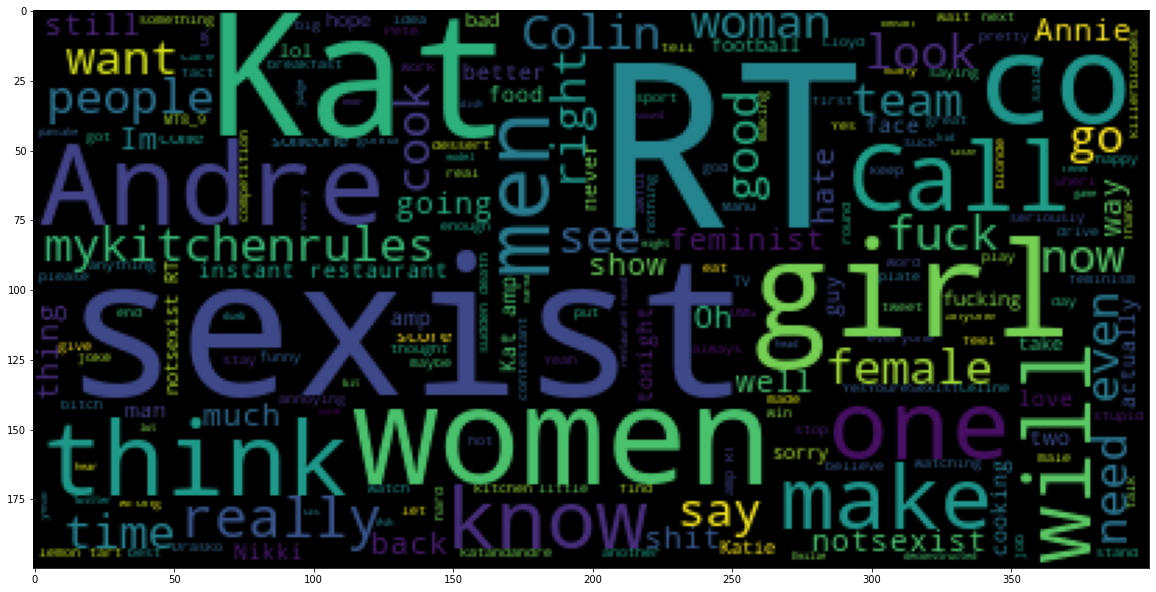

In [26]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

MINI CHALLENGE #4: 
- Plot the wordcloud of the "negative" dataframe. 
- What do you notice? Does the data make sense?

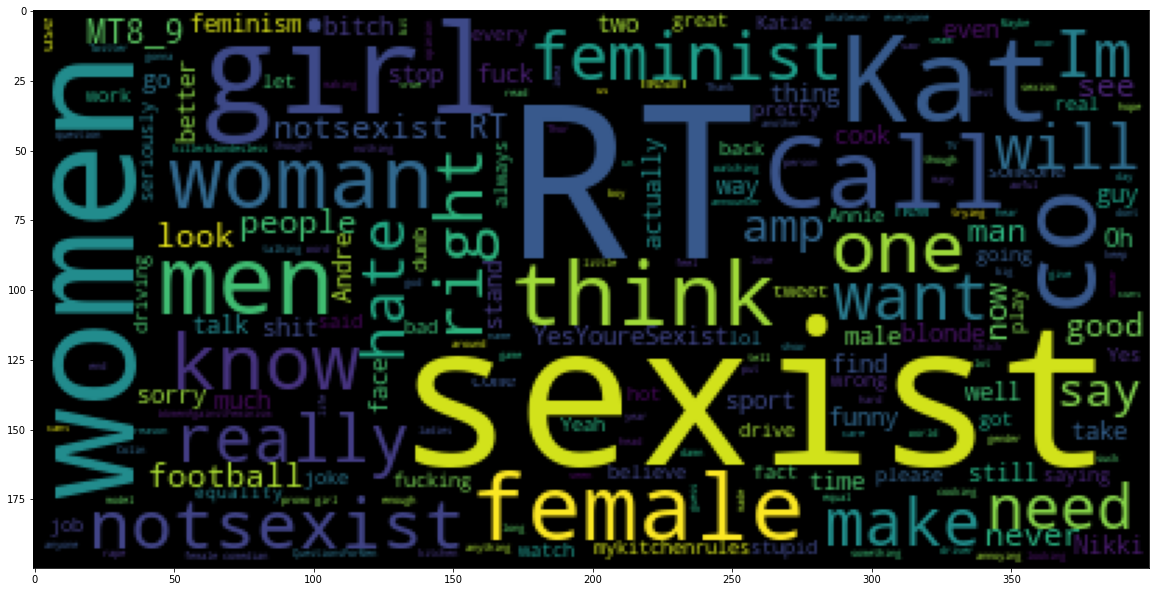

In [27]:
neg = negative['tweet'].tolist()
negsentence = " ".join(neg)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negsentence))


# TASK #5: PERFORM DATA CLEANING - REMOVE PUNCTUATION FROM TEXT

In [28]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
Test = 'Good morning beautiful people :)... I am having fun learning Machine learning and AI!!'

In [30]:
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed

['G',
 'o',
 'o',
 'd',
 ' ',
 'm',
 'o',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'b',
 'e',
 'a',
 'u',
 't',
 'i',
 'f',
 'u',
 'l',
 ' ',
 'p',
 'e',
 'o',
 'p',
 'l',
 'e',
 ' ',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 'h',
 'a',
 'v',
 'i',
 'n',
 'g',
 ' ',
 'f',
 'u',
 'n',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'M',
 'a',
 'c',
 'h',
 'i',
 'n',
 'e',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'A',
 'I']

In [31]:
# Join the characters again to form the string.
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'Good morning beautiful people  I am having fun learning Machine learning and AI'

MINI CHALLENGE #5: 
- Remove punctuations using a different method


# TASK 6: PERFORM DATA CLEANING - REMOVE STOPWORDS

In [32]:
import nltk # Natural Language tool kit 

nltk.download('stopwords')

/home/pavan/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1056)>


False

In [33]:
# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [34]:
Test_punc_removed_join

'Good morning beautiful people  I am having fun learning Machine learning and AI'

In [35]:
Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]

In [36]:
Test_punc_removed_join_clean # Only important (no so common) words are left

['Good',
 'morning',
 'beautiful',
 'people',
 'fun',
 'learning',
 'Machine',
 'learning',
 'AI']

MINI CHALLENGE #6: 
- For the following text, create a pipeline to remove punctuations followed by removing stopwords

In [37]:
mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations!'

# TASK 7: PERFORM COUNT VECTORIZATION (TOKENIZATION)

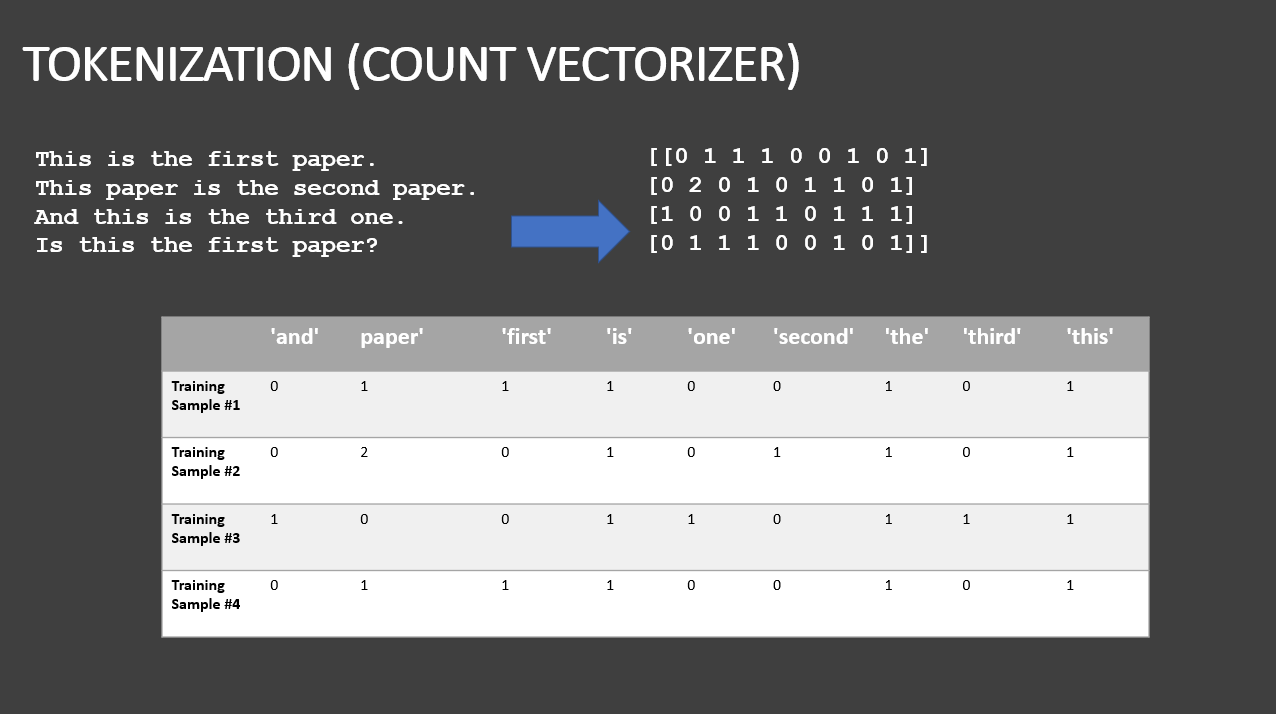

In [38]:

from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.','This document is the second paper.','And this is the third one.','Is this the first paper?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)


In [39]:
print(vectorizer.get_feature_names())


['and', 'document', 'first', 'is', 'one', 'paper', 'second', 'the', 'third', 'this']


In [40]:
print(X.toarray())  

[[0 0 1 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 1 1 0 1]
 [1 0 0 1 1 0 0 1 1 1]
 [0 0 1 1 0 1 0 1 0 1]]


MINI CHALLENGE #7:
- Without doing any code, perform count vectorization for the following list:
    -  mini_challenge = ['Hello World','Hello Hello World','Hello World world world']
- Confirm your answer with code

# TASK #8: CHANGE MADE HERE, CORRECT EVERYWHERE

In [79]:
# Define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords
import re
from nltk.stem import WordNetLemmatizer

def message_cleaning(message):
    message = ' '.join(nltk.word_tokenize(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",message)))
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word.lower() for word in nltk.word_tokenize(Test_punc_removed_join) if word.lower() not in stopwords.words('english')]
    wordnet_lemmatizer = WordNetLemmatizer()
    lemma_list = [wordnet_lemmatizer.lemmatize(word) for word in Test_punc_removed_join_clean]
    return lemma_list

In [80]:
# Let's test the newly added function
tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)

In [81]:
tweets_df_clean[1:10] # show the cleaned up version

1    [drasko, said, impressed, girl, cooked, half, ...
2                    [drasko, cook, half, bird, idiot]
3                    [drasko, cook, half, bird, idiot]
4         [hopefully, someone, cook, drasko, next, ep]
5         [hopefully, someone, cook, drasko, next, ep]
6        [course, born, serbia, fucked, serbian, film]
7    [girl, equivalent, irritating, asian, girl, co...
8    [lost, plot, big, texan, elephant, sized, stea...
9    [lost, plot, big, texan, elephant, sized, stea...
Name: tweet, dtype: object

In [82]:
print(tweets_df['tweet'][5]) # show the original version

Hopefully someone cooks Drasko in the next ep of 


In [83]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
tweets_countvectorizer = CountVectorizer(analyzer = message_cleaning, dtype = 'uint8').fit_transform(tweets_df['tweet']).toarray()
#tweets_countvectorizer = vectorizer

In [84]:
#print(tweets_df.get_feature_names())


In [85]:
print(tweets_countvectorizer)  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [86]:
tweets_countvectorizer.shape

(5997, 7516)

In [87]:
tweets = pd.DataFrame(tweets_countvectorizer)
# 'zzzzzzzz'

In [88]:
# tweets = tweets_countvectorizer.toarray()

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer
tweets_tfidfvectorizer = TfidfVectorizer(analyzer = message_cleaning, dtype = 'uint8').fit_transform(tweets_df['tweet']).toarray()

/home/pavan/snap/jupyter/common/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:1799: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. uint8 'dtype' will be converted to np.float64.
  UserWarning)


In [90]:
print(tweets_tfidfvectorizer)  

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [91]:
tweets_tfidfvectorizer.shape

(5997, 7516)

In [92]:
tweets = pd.DataFrame(tweets_tfidfvectorizer)

In [93]:
X = tweets_tfidfvectorizer

In [94]:
y = tweets_df['bullying']

# TASK #9: UNDERSTAND THE THEORY AND INTUITION BEHIND NAIVE BAYES

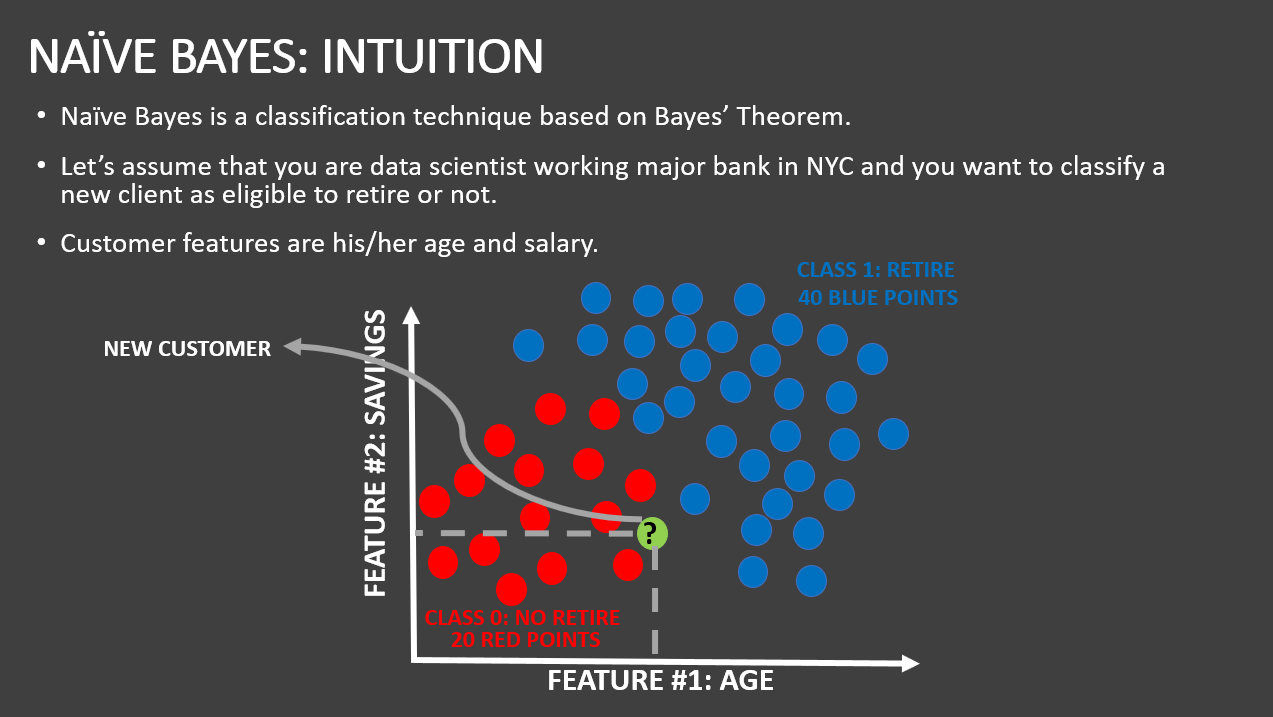

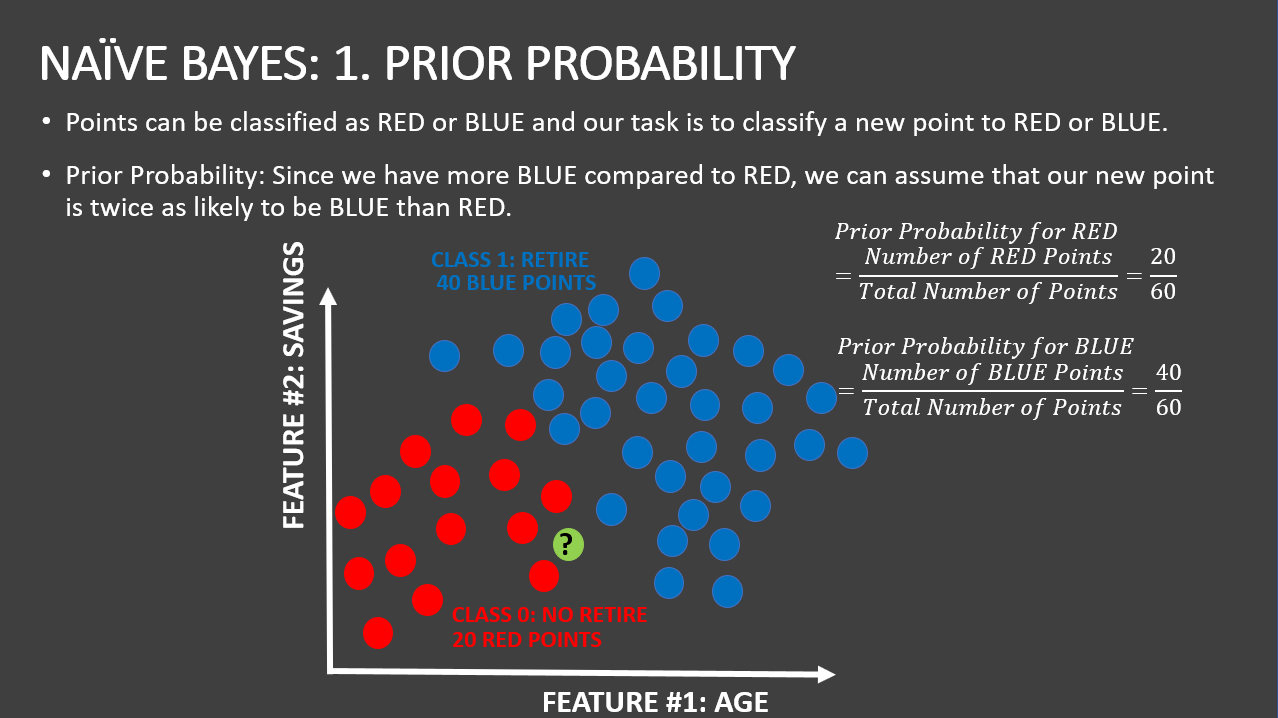

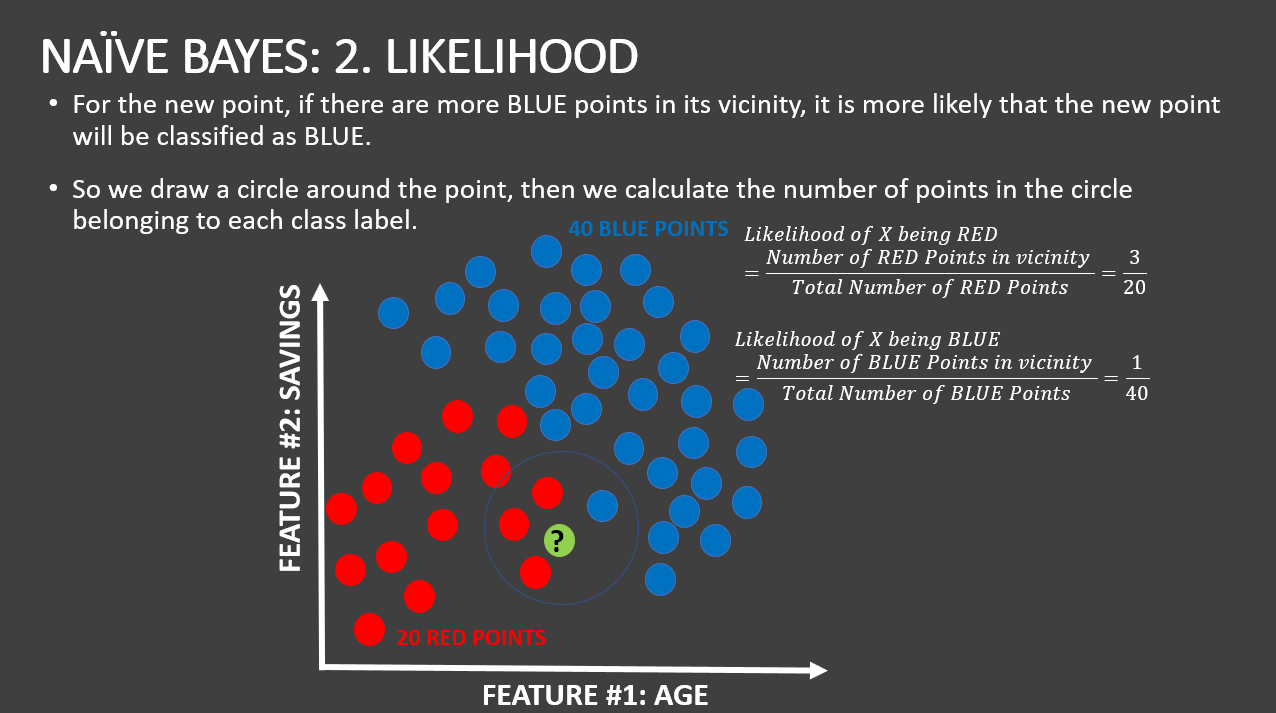

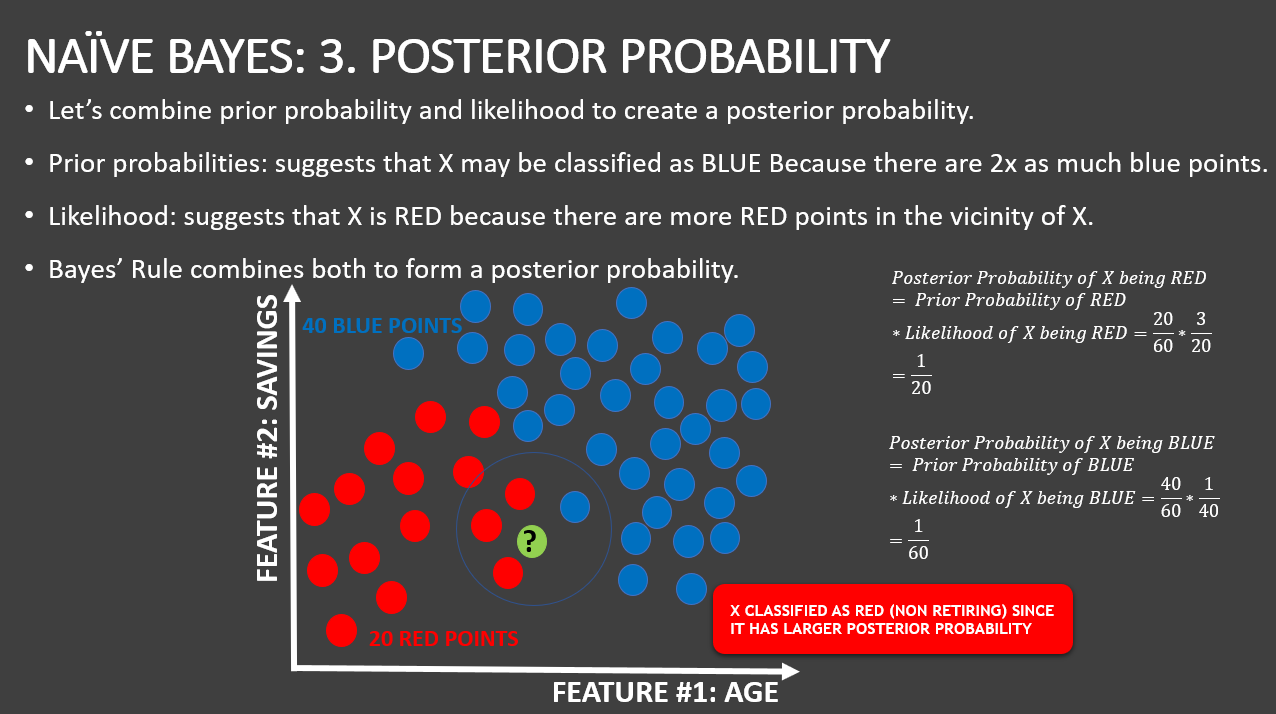

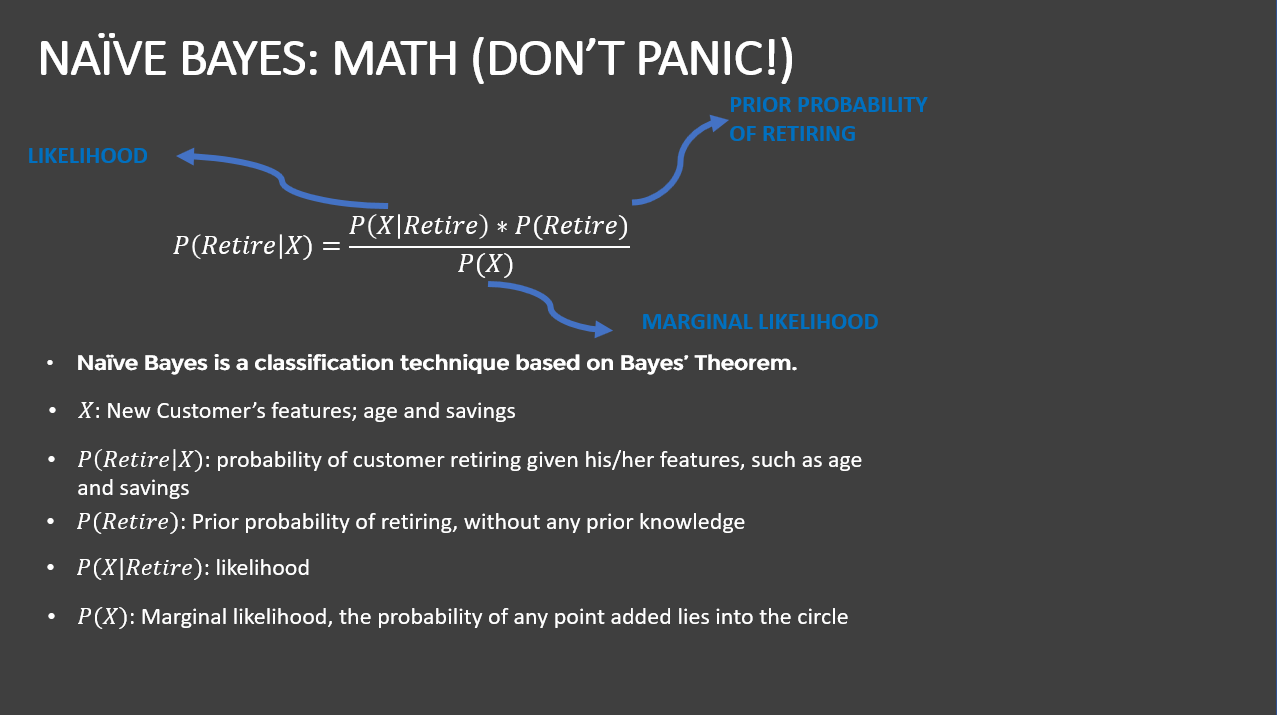

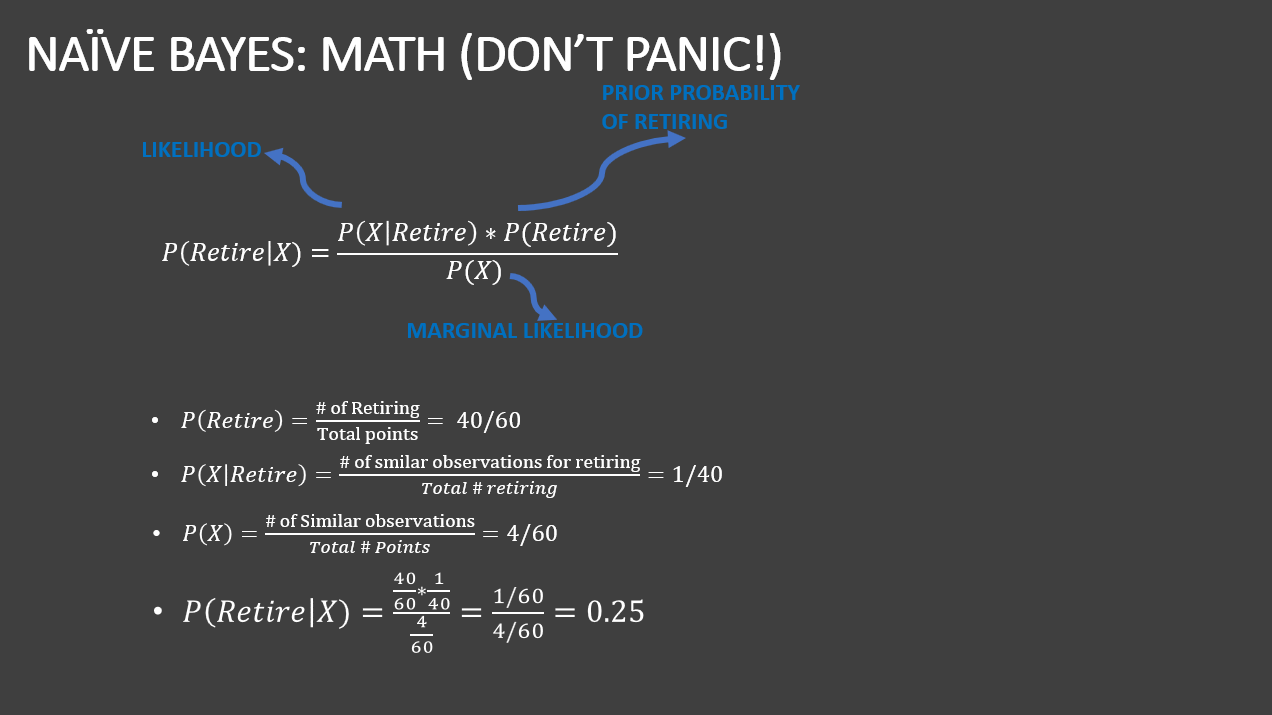

MINI CHALLENGE #8

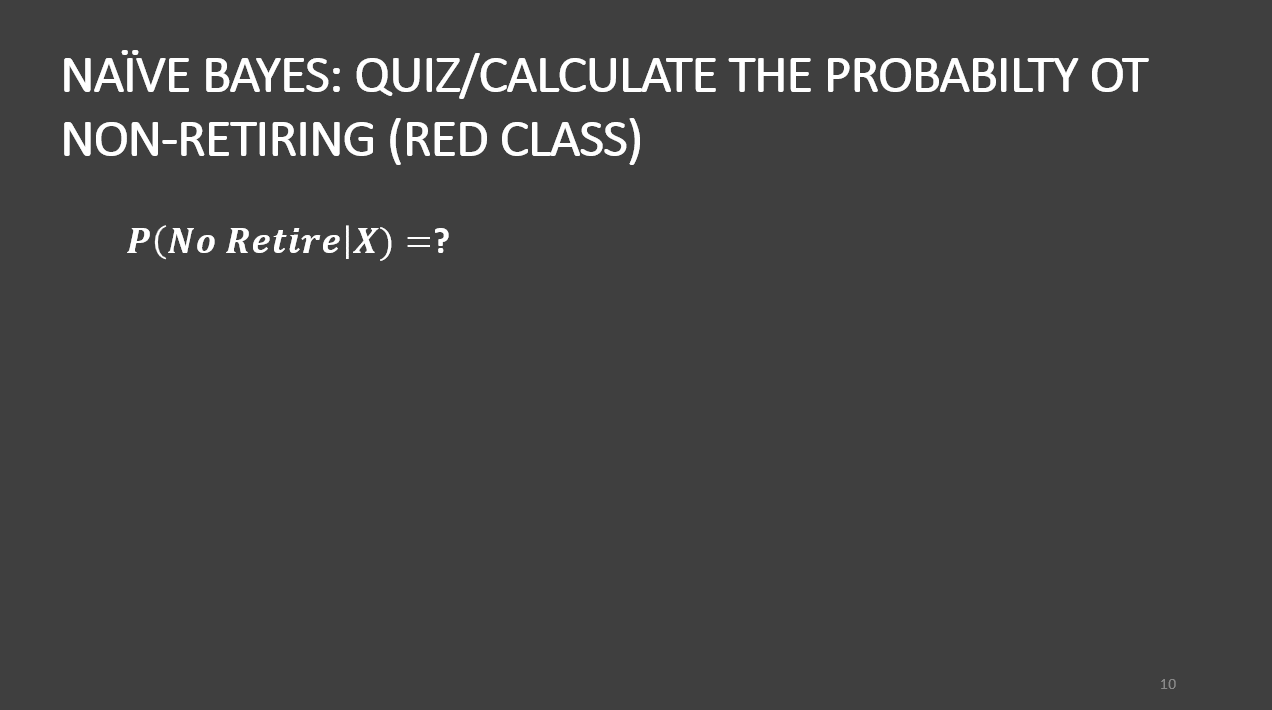

# TASK #10: TRAIN A NAIVE BAYES CLASSIFIER MODEL

In [95]:
X.shape

(5997, 7516)

In [96]:
y.shape

(5997,)

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tweets_tfidfvectorizer, tweets_df['bullying'], test_size=0.2,random_state=10)

In [98]:
#del X

In [99]:
#del y 

In [100]:
X_train.dtype

dtype('float64')

In [101]:
from sklearn import svm

SV_Classifier = svm.SVC()
SV_Classifier.fit(X_train, y_train)

SVC()

# TASK #11: ASSESS TRAINED MODEL PERFORMANCE  

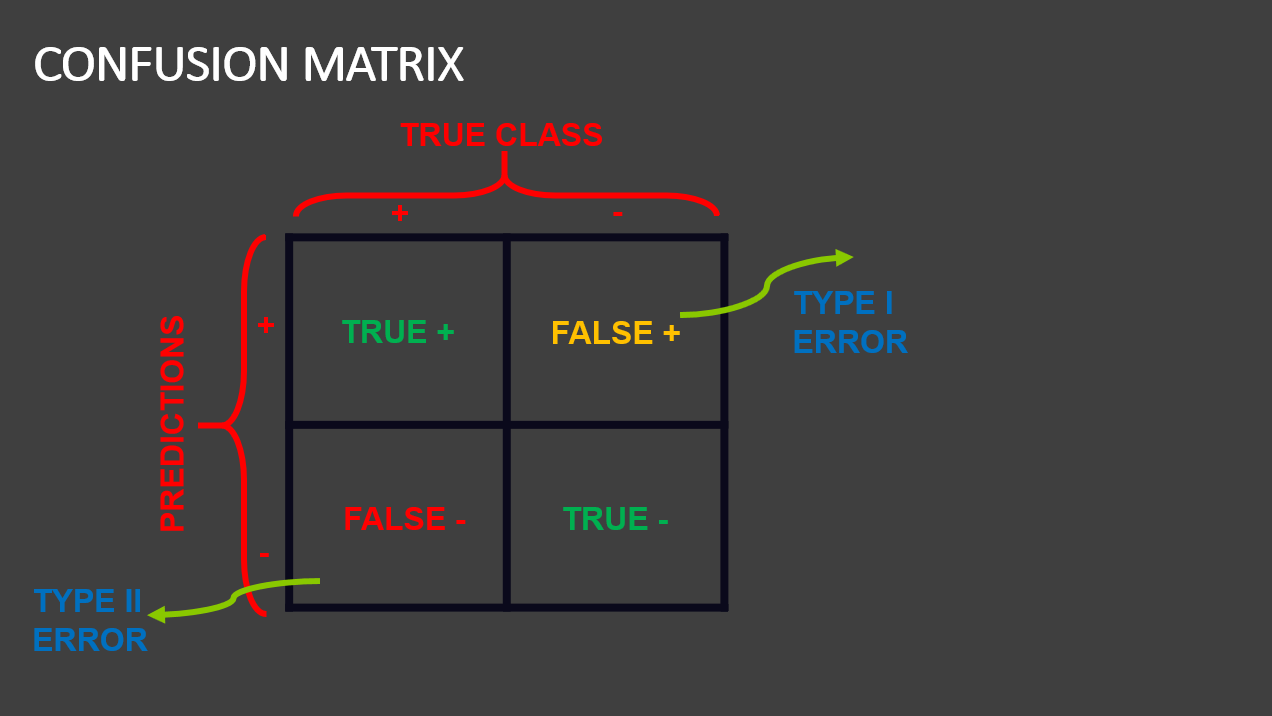

In [102]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:>

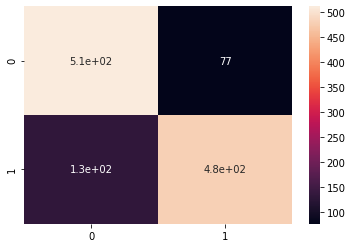

In [103]:
# Predicting the Test set results
y_predict_test = SV_Classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [104]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       588
           1       0.86      0.78      0.82       612

    accuracy                           0.83      1200
   macro avg       0.83      0.83      0.83      1200
weighted avg       0.83      0.83      0.83      1200



# EXCELLENT JOB! YOU SHOULD BE PROUD OF YOUR NEWLY ACQUIRED SKILLS

MINI CHALLENGE SOLUTIONS

MINI CHALLENGE #1

In [472]:
# Drop the 'id' column
tweets_df = tweets_df.drop(['id'], axis=1)

KeyError: "['id'] not found in axis"

MINI CHALLENGE #2

In [ ]:
sns.countplot(tweets_df['label'], label = "Count") 

MINI CHALLENGE #3

In [ ]:
# Let's see the message with mean length 
tweets_df[tweets_df['length'] == 84]['tweet'].iloc[0]

MINI CHALLENGE #4

In [ ]:
negative_list = negative['tweet'].tolist()
negative_list
negative_sentences_as_one_string = " ".join(negative_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

MINI CHALLENGE #5

In [ ]:
Test_punc_removed = []
for char in Test: 
    if char not in string.punctuation:
        Test_punc_removed.append(char)
        
# Join the characters again to form the string.
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

MINI CHALLENGE #6

In [ ]:
challege = [ char     for char in mini_challenge  if char not in string.punctuation ]
challenge = ''.join(challege)
challenge = [  word for word in challenge.split() if word.lower() not in stopwords.words('english')  ] 

MINI CHALLENGE #7

In [ ]:
mini_challenge = ['Hello World','Hello Hello World','Hello World world world']

vectorizer_challenge = CountVectorizer()
X_challenge = vectorizer_challenge.fit_transform(mini_challenge)
print(X_challenge.toarray())

MINI CHALLENGE #8

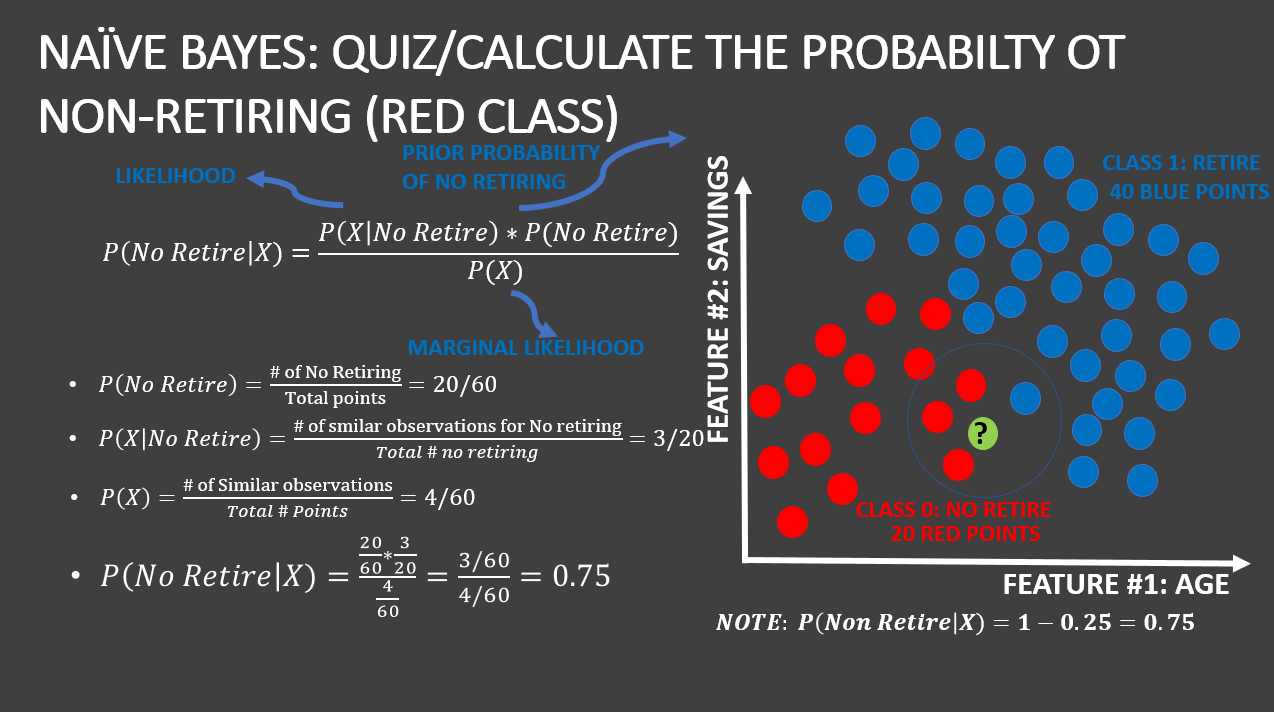